# Warmest SST Location

Quick ocena trivia check, where is the warmest SST on Earth and When did it occur.

In [1]:
# Load Packages
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import geopandas as gpd
import regionmask
import oisstools as ot
import cartopy.crs as ccrs


# Set the workspace - local/ docker
workspace = "local"
box_root = ot.set_workspace(workspace)

# document what choices were made on last run:
print(f"Working via directory at: {box_root}")

Working via directory at: /Users/akemberling/Box/


## Load Global SST

In [3]:
# Load all years of oisst and anomalies
oisst = ot.load_box_oisst(box_root, 
                          1981, 
                          2021, 
                          anomalies = False, 
                          do_parallel = True)
oisst = ot.add_mod(oisst, 'time')

## Process Max SST Values

In [4]:
oisst

,Array,Chunk
Bytes,60.52 GB,1.52 GB
Shape,"(14592, 720, 1440)","(366, 720, 1440)"
Count,123 Tasks,41 Chunks
Type,float32,numpy.ndarray


In [29]:
# Pull out sst as DataArray
sst_da = oisst.sst.drop("MOD")
sst_da

,Array,Chunk
Bytes,60.52 GB,1.52 GB
Shape,"(14592, 720, 1440)","(366, 720, 1440)"
Count,123 Tasks,41 Chunks
Type,float32,numpy.ndarray


/Users/akemberling/opt/anaconda2/envs/py36/lib/python3.6/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/akemberling/opt/anaconda2/envs/py36/lib/python3.6/site-packages/toolz/functoolz.py:488: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


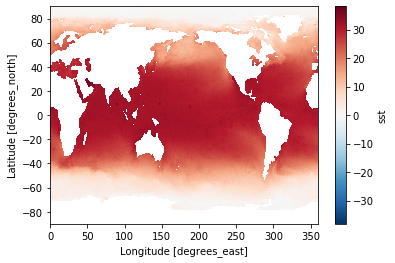

In [30]:
# Plotting max at each location?
oisst_max = sst_da.max(["time"], skipna = True)
oisst_max.plot()

In [31]:
# Array of maximum sst
sst_da.max(skipna = True)

<xarray.DataArray 'sst' ()>
dask.array<nanmax-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

## Extract When They Occur

In [ ]:
# Find where maximum occurred
max_record = sst_da.where(sst_da == sst_da.max(skipna = True), drop=True).squeeze()

In [42]:
# lon
max_record.coords["lon"].values

array(90.125, dtype=float32)

In [43]:
# lat
max_record.coords["lon"].values

array(90.125, dtype=float32)

In [ ]:
# How hot was it?
max_record.values